# Tarefa Dataset Grupo

### Produção Energética e Sustentabilidade

https://www.kaggle.com/competitions/daasbstp2023

Imports Necessários

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#USING CROSS VALIDATION
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import re
import seaborn as sns



Ingestão de Dados

In [49]:
df_energia_2021 = pd.read_csv('energia_202109-202112.csv',na_filter=False)
print (df_energia_2021.size)
df_energia_2022 = pd.read_csv('energia_202201-202212.csv',na_filter=False)
df_meteo_2021 = pd.read_csv('meteo_202109-202112.csv',na_filter=False)
df_meteo_2022 = pd.read_csv('meteo_202201-202212.csv',na_filter=False)

#ver os cabeçalhos para fazer merge por data e hora

print(df_energia_2021.head())
print(df_meteo_2021.head())


# o dia era interessante fazer com o dia do ano -1 até 365. Não há anos bissextos, não há problema
print (df_meteo_2021.dtypes)
print (df_energia_2021.dtypes)
print (df_meteo_2021['dt_iso'])
form = re.compile(r'(\d{4}-\d{2}-\d{2})\s(\d{2}):\d{2}:\d{2}\s\+\d{4}\sUTC')
#df_meteo_2021['Data'],df_meteo_2021['Hora'] =df_meteo_2021['dt_iso'].str.extract(form)

#desdobrar data para o dataset meteorológico de 2021
data= df_meteo_2021['dt_iso'].str.extract(form)
df_meteo_2021['Data']= data[0]
df_meteo_2021['Hora']= pd.to_numeric(data[1])
#df_meteo_2021['Data'], df_meteo_2021['Hora'] = zip(*df_meteo_2021['dt_iso'].str.extract(form).values)
df_meteo_2021.drop(['dt_iso'], axis='columns', inplace=True)

#desdobrar data para o dataset meteorológico de 2022
data= df_meteo_2022['dt_iso'].str.extract(form)
df_meteo_2022['Data']= data[0]
df_meteo_2022['Hora']= pd.to_numeric(data[1])
#df_meteo_2022['Data'], df_meteo_2022['Hora'] = zip(*df_meteo_2022['dt_iso'].str.extract(form).values)
df_meteo_2022.drop(['dt_iso'], axis='columns', inplace=True)

print (df_meteo_2021.head())
print (df_meteo_2022.head())

df_2021 = pd.merge(df_energia_2021,df_meteo_2021, how='inner', on=['Data','Hora']) 
df_2022 = pd.merge(df_energia_2022,df_meteo_2022, how='inner', on=['Data','Hora'])

df_train= pd.concat([df_2021, df_2022], ignore_index=True)

##TESTE

df_energia_2023 = pd.read_csv('energia_202301-202304.csv')
df_meteo_2023 = pd.read_csv('meteo_202301-202304.csv')

#desdobrar data para o dataset meteorológico de 2023
data= df_meteo_2023['dt_iso'].str.extract(form)
df_meteo_2023['Data']= data[0]
df_meteo_2023['Hora']= pd.to_numeric(data[1])
#df_meteo_2022['Data'], df_meteo_2022['Hora'] = zip(*df_meteo_2022['dt_iso'].str.extract(form).values)
df_meteo_2023.drop(['dt_iso'], axis='columns', inplace=True)

df_2023 = pd.merge(df_energia_2023,df_meteo_2023, how='left', on=['Data','Hora']) 

def extrair_mes_dia(row):
    # Use uma expressão regular para encontrar o mês e o dia na data
    padrao = r"\d{4}-(\d{2}-\d{2})"
    correspondencia = re.match(padrao, row['Data'])
    
    # Use os grupos capturados para obter o mês e o dia
    mes= correspondencia.group(1)
    return mes

def periodo_dia(row):
    if  row['Sunrise']<= row['Hora'] < 12:
    #if  8< row['Hora'] < 12:
        return 0
    elif 12 <= row['Hora'] < row['Sunset']:
    #elif 12 <= row['Hora'] < 8:
        return 1
    else:
        return 2

df_sunrise = pd.read_csv('data.csv')
for df in [df_train,df_2023]:
    df['Dia'] = df.apply(extrair_mes_dia, axis=1) 

df_train = pd.merge(df_train,df_sunrise, how='inner', on=['Dia'])
df_train['Periodo']= df_train.apply(periodo_dia, axis=1)
print(df_train.head())
df_train.drop('Dia',axis='columns', inplace=True)
df_train.drop('Sunset',axis='columns', inplace=True)
df_train.drop('Sunrise',axis='columns', inplace=True)

df_2023 = pd.merge(df_2023,df_sunrise, how='inner', on=['Dia'])
df_2023['Periodo']= df_2023.apply(periodo_dia, axis=1)
print(df_2023.head())
df_2023.drop('Dia',axis='columns', inplace=True)
df_2023.drop('Sunset',axis='columns', inplace=True)
df_2023.drop('Sunrise',axis='columns', inplace=True)

print(df_train.dtypes)
print(df_2023.dtypes)


13536
         Data  Hora  Normal (kWh)  Horario Economico (kWh)  Autoconsumo (kWh)  \
0  2021-09-29     0           0.0                      0.0                0.0   
1  2021-09-29     1           0.0                      0.0                0.0   
2  2021-09-29     2           0.0                      0.0                0.0   
3  2021-09-29     3           0.0                      0.0                0.0   
4  2021-09-29     4           0.0                      0.0                0.0   

  Injecao na rede (kWh)  
0                  None  
1                  None  
2                  None  
3                  None  
4                  None  
           dt                         dt_iso city_name   temp  feels_like  \
0  1630454400  2021-09-01 00:00:00 +0000 UTC     local  18.74       18.84   
1  1630458000  2021-09-01 01:00:00 +0000 UTC     local  18.73       18.83   
2  1630461600  2021-09-01 02:00:00 +0000 UTC     local  17.84       17.98   
3  1630465200  2021-09-01 03:00:00 +0000 UT

Análise de Dados


Verificar se a construção dos datasets foi bem realizada

In [50]:
df_train.shape

(11016, 21)

In [51]:
df_train.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injecao na rede (kWh),dt,city_name,temp,feels_like,...,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,Periodo
0,2021-09-29,0,0.0,0.0,0.0,None,1632873600,local,13.97,13.54,...,14.04,1027,,,81,1.96,,87,overcast clouds,2
1,2021-09-29,1,0.0,0.0,0.0,None,1632877200,local,13.48,13.02,...,13.90,1028,,,82,1.83,,91,overcast clouds,2
2,2021-09-29,2,0.0,0.0,0.0,None,1632880800,local,12.93,12.47,...,13.43,1027,,,84,1.96,,93,overcast clouds,2
3,2021-09-29,3,0.0,0.0,0.0,None,1632884400,local,12.61,12.15,...,12.93,1027,,,85,1.85,,95,overcast clouds,2
4,2021-09-29,4,0.0,0.0,0.0,None,1632888000,local,12.61,12.17,...,12.93,1027,,,86,1.83,,93,overcast clouds,2


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horario Economico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injecao na rede (kWh)    11016 non-null  object 
 6   dt                       11016 non-null  int64  
 7   city_name                11016 non-null  object 
 8   temp                     11016 non-null  float64
 9   feels_like               11016 non-null  float64
 10  temp_min                 11016 non-null  float64
 11  temp_max                 11016 non-null  float64
 12  pressure                 11016 non-null  int64  
 13  sea_level                11016 non-null  object 
 14  grnd_level            

Verificar se a construção dos datasets foi bem realizada

In [53]:
df_train.describe()



,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,Periodo
count,11016.000000,11016.000000,11016.000000,11016.000000,1.101600e+04,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,11.500000,0.202278,0.159714,0.117314,1.652701e+09,16.182991,15.826868,14.195064,17.288098,1018.396605,76.570715,2.672039,54.000908,1.323257
std,6.922501,0.349478,0.271792,0.176762,1.144868e+07,5.756972,6.264860,4.956014,6.164689,6.203379,16.268260,1.476158,40.553002,0.762958
min,0.000000,0.000000,0.000000,0.000000,1.632874e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,19.000000,0.060000,0.000000,0.000000
25%,5.750000,0.000000,0.000000,0.000000,1.642787e+09,12.080000,11.507500,10.720000,12.890000,1015.000000,66.000000,1.620000,7.000000,1.000000
50%,11.500000,0.000000,0.000000,0.000000,1.652701e+09,15.625000,15.230000,14.230000,16.260000,1018.000000,81.000000,2.400000,60.000000,2.000000
75%,17.250000,0.314000,0.288000,0.227000,1.662614e+09,19.270000,19.260000,17.490000,20.340000,1022.000000,91.000000,3.420000,98.000000,2.000000
max,23.000000,3.251000,6.978000,1.192000,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,100.000000,11.100000,100.000000,2.000000


Visualização de Mising values

In [54]:
df_train.isna().sum()

Data                       0
Hora                       0
Normal (kWh)               0
Horario Economico (kWh)    0
Autoconsumo (kWh)          0
Injecao na rede (kWh)      0
dt                         0
city_name                  0
temp                       0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level                  0
grnd_level                 0
humidity                   0
wind_speed                 0
rain_1h                    0
clouds_all                 0
weather_description        0
Periodo                    0
dtype: int64

Verificação de todos os valores da coluna Injeção na rede

'\nf_train=df_train.fillna({\'Injecao na rede (kWh)\': \'None\'})\n\nprint (df_train.isna().sum())\n\nsns.histplot(df_train["weather_description"],y=df_train["weather_description"])\nsns.histplot(df_2023["weather_description"],y=df_2023["weather_description"])\n\nsns.histplot(df_train["city_name"],y=df_train["city_name"])\nsns.histplot(df_2023["city_name"],y=df_2023["city_name"])\n\nprint(df_train.describe())\n\n\n\n\nprint (df_train.shape) # verfiicar se o número de linhas está correto\n\nprint(df_train.info())\n'

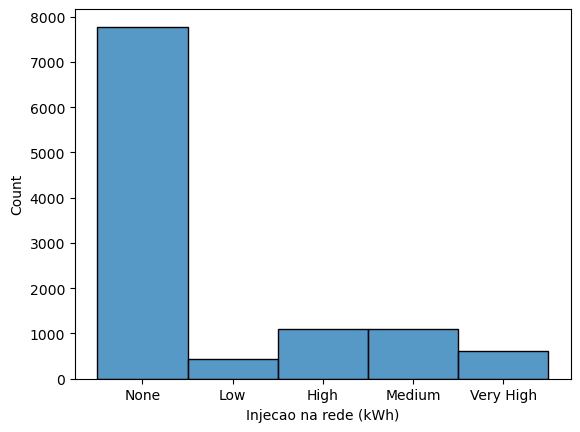

In [55]:
sns.histplot(df_train["Injecao na rede (kWh)"])















"""
f_train=df_train.fillna({'Injecao na rede (kWh)': 'None'})

print (df_train.isna().sum())

sns.histplot(df_train["weather_description"],y=df_train["weather_description"])
sns.histplot(df_2023["weather_description"],y=df_2023["weather_description"])

sns.histplot(df_train["city_name"],y=df_train["city_name"])
sns.histplot(df_2023["city_name"],y=df_2023["city_name"])

print(df_train.describe())




print (df_train.shape) # verfiicar se o número de linhas está correto

print(df_train.info())
"""

In [64]:
df_train['Injecao na rede (kWh)'].value_counts()

Injecao na rede (kWh)
None         7777
High         1103
Medium       1098
Very High     606
Low           432
Name: count, dtype: int64

O campo weather_description possuem os mesmos valores para o campo weather_description

<Axes: xlabel='Count', ylabel='weather_description'>

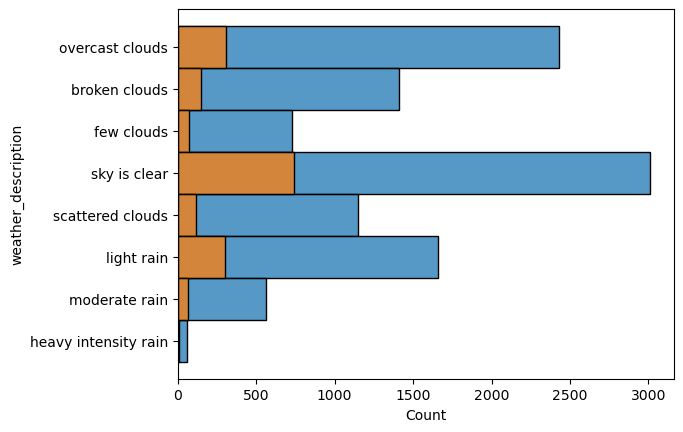

In [56]:
sns.histplot(df_train["weather_description"],y=df_train["weather_description"])
sns.histplot(df_2023["weather_description"],y=df_2023["weather_description"])

Os dados indicam que as medições foram todos realizados numa única cidade,que segundo o enunciado do problema é Braga

<Axes: xlabel='Count', ylabel='city_name'>

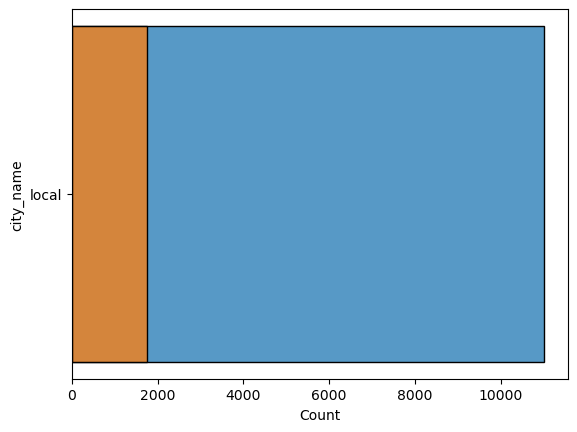

In [57]:
sns.histplot(df_train["city_name"],y=df_train["city_name"])
sns.histplot(df_2023["city_name"],y=df_2023["city_name"])

0- Manhã
1-Tarde
2-Noite


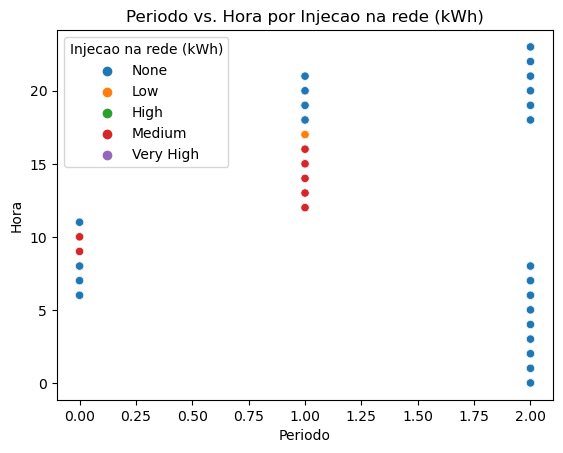

In [58]:
sns.scatterplot(x='Periodo', y='Hora', hue='Injecao na rede (kWh)', data=df_train)
plt.title('Periodo vs. Hora por Injecao na rede (kWh)')
plt.xlabel('Periodo')
plt.ylabel('Hora')
plt.show()

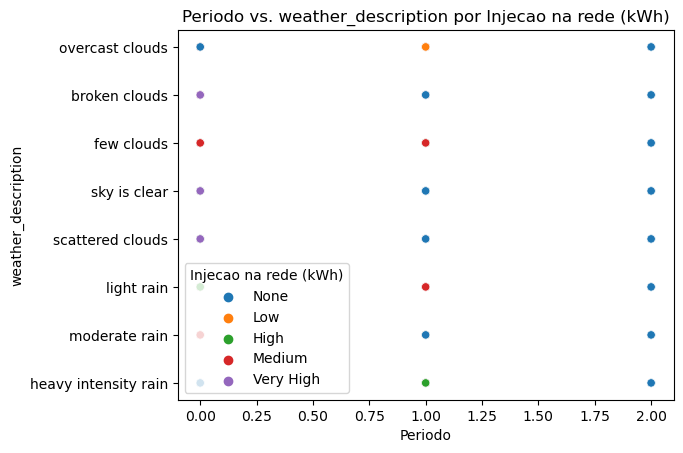

In [59]:
sns.scatterplot(x='Periodo', y='weather_description', hue='Injecao na rede (kWh)', data=df_train)
plt.title('Periodo vs. weather_description por Injecao na rede (kWh)')
plt.xlabel('Periodo')
plt.ylabel('weather_description')
plt.show()

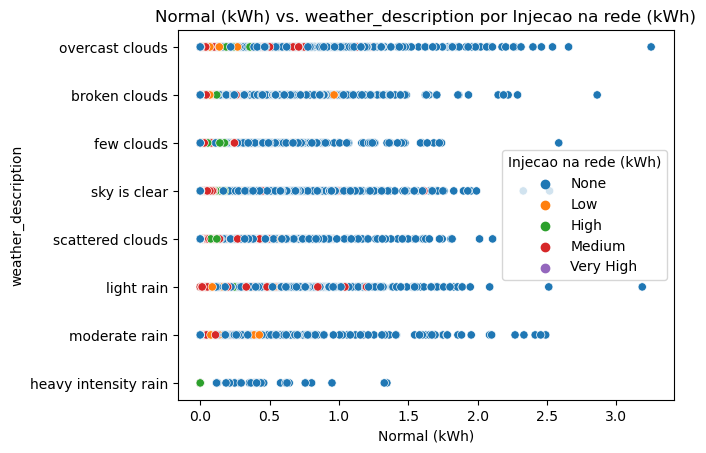

In [60]:
sns.scatterplot(x='Normal (kWh)', y='weather_description', hue='Injecao na rede (kWh)', data=df_train)
plt.title('Normal (kWh) vs. weather_description por Injecao na rede (kWh)')
plt.xlabel('Normal (kWh)')
plt.ylabel('weather_description')
plt.show()

Matriz de Correlação

In [61]:
#correlation_matrix = df_train.corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.show()

Tratamento de Dados

0        0.000
1        0.000
2        0.000
3        0.000
4        0.000
         ...  
11011    0.000
11012    0.000
11013    0.000
11014    0.498
11015    0.446
Name: Horario Economico (kWh), Length: 11016, dtype: float64


"\n#churn to nominal\ndf['Churn'] = df['Churn'].astype('category') #.apply(str)\nprint(df.dtypes)\n\n# fazer um matplotlib com os churns \n#print(df.head())\n\nx = df.drop(['Churn','State','Phone'], axis=1)\ny = df['Churn'].to_frame()\n\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2021)\n\nclf = DecisionTreeClassifier(random_state=2021)\n\nclf.fit(x_train, y_train)\n\npredict = clf.predict(x_test)\n\nconfusion_matrix = confusion_matrix(y_test, predict)\n\nprint(confusion_matrix)\n\nprint(confusion_matrix)\n\naccuracy = accuracy_score(y_test, predict)\n\nprint(accuracy)\n\nprecision = precision_score(y_test, predict)\n\nprint(precision)\n\nrecall = recall_score(y_test, predict)\n\nprint(recall)\n\n"

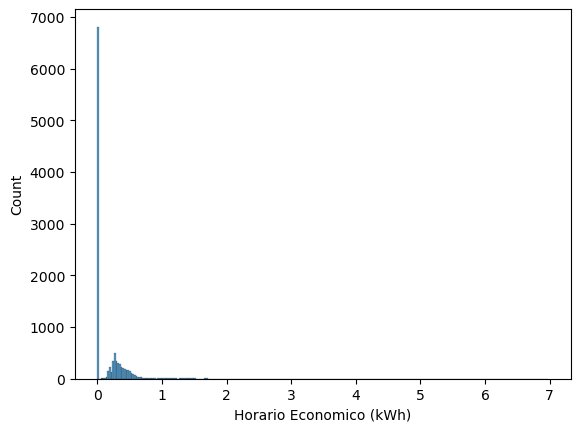

In [62]:

#print(f"History: {df_train["Horario Economico (kWh)"].hist()}")
sns.histplot(df_train["Horario Economico (kWh)"])
print(df_train["Horario Economico (kWh)"])
#print(dfCSV.head())
#print(dfXLS.head())

form = re.compile(r'\d{4}-(\d{2})-\d{2}')

data= df_train['Data'].str.extract(form)
df_train['Mes']= pd.to_numeric(data[0])
#df_meteo_2023['Hora']= pd.to_numeric(data[1])
data= df_2023['Data'].str.extract(form)
df_2023['Mes']= pd.to_numeric(data[0])


def data_para_estacao(data):
    # Divida a data em mês e dia
    mes, dia = data.month, data.day
    
    # Determine a estação com base no mês e dia
    if (mes > 3 and mes <= 5) or (mes == 3 and dia >= 21) or (mes == 6 and dia < 21):
        return 1
    elif (mes >= 6 and mes <= 8) or (mes == 9 and dia < 23):
        return 2
    elif (mes >= 9 and mes <= 11) or (mes == 12 and dia < 21) :
        return 3
    else:
        return 4

# Converta a coluna 'Data' em datetime
df_train['Data'] = pd.to_datetime(df_train['Data'])

# Aplique a função para obter a estação do ano
df_train['Estacao'] = df_train['Data'].apply(data_para_estacao)


# Converta a coluna 'Data' em datetime
df_2023['Data'] = pd.to_datetime(df_2023['Data'])

# Aplique a função para obter a estação do ano
df_2023['Estacao'] = df_2023['Data'].apply(data_para_estacao)


df_train['Injecao na rede (kWh)']= df_train['Injecao na rede (kWh)'].astype('category')




#form = re.compile(r'\d{4}-\d{2}-(\d{2})')
#data= df_train['Data'].str.extract(form)
#df_train['Dia']= pd.to_numeric(data[0])
#data= df_2023['Data'].str.extract(form)
#df_2023['Dia']= pd.to_numeric(data[0])

#df_train['rain_1h'] = df_train['rain_1h'].fillna(0)
#df_2023['rain_1h'] = df_2023['rain_1h'].fillna(0)

"""
#churn to nominal
df['Churn'] = df['Churn'].astype('category') #.apply(str)
print(df.dtypes)

# fazer um matplotlib com os churns 
#print(df.head())

x = df.drop(['Churn','State','Phone'], axis=1)
y = df['Churn'].to_frame()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2021)

clf = DecisionTreeClassifier(random_state=2021)

clf.fit(x_train, y_train)

predict = clf.predict(x_test)

confusion_matrix = confusion_matrix(y_test, predict)

print(confusion_matrix)

print(confusion_matrix)

accuracy = accuracy_score(y_test, predict)

print(accuracy)

precision = precision_score(y_test, predict)

print(precision)

recall = recall_score(y_test, predict)

print(recall)

"""

Aprendizagem Supervisionada

0        None
1        None
2        None
3        None
4        None
         ... 
11011    None
11012    None
11013    None
11014    None
11015    None
Name: Injecao na rede (kWh), Length: 11016, dtype: category
Categories (5, object): ['None' < 'Low' < 'Medium' < 'High' < 'Very High']
Data                       datetime64[ns]
Hora                                int64
Normal (kWh)                      float64
Horario Economico (kWh)           float64
Autoconsumo (kWh)                 float64
Injecao na rede (kWh)            category
dt                                  int64
city_name                          object
temp                              float64
feels_like                        float64
temp_min                          float64
temp_max                          float64
pressure                            int64
sea_level                          object
grnd_level                         object
humidity                            int64
wind_speed                        float

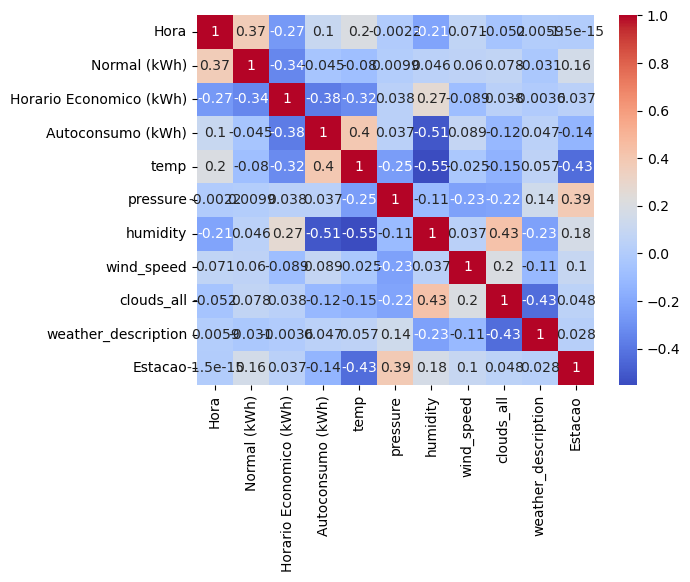

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

#label_encoder = LabelEncoder()
#df_train['Injecao na rede (kWh)'] = label_encoder.fit_transform(df_train['Injecao na rede (kWh)'])
#print(df_train["Injecao na rede (kWh)"])
#ordem_personalizada = ['None', 'Low', 'Medium','High','Very High']

# Inicialize o LabelEncoder
#label_encoder = LabelEncoder()

# Ajuste o LabelEncoder para a ordem personalizada
#label_encoder.fit(ordem_personalizada)

# Aplique o mapeamento ao DataFrame usando o método transform
#df_train['Injecao na rede (kWh)'] = label_encoder.fit_transform(df_train['Injecao na rede (kWh)'])

espectro_cat_type = pd.CategoricalDtype(categories=['None', 'Low', 'Medium','High','Very High'], 
                                        ordered=True)
     

df_train['Injecao na rede (kWh)'] = df_train['Injecao na rede (kWh)'].astype(espectro_cat_type)
#print(df_train.dtypes)
print(df_train['Injecao na rede (kWh)'])


label_encoder = LabelEncoder()
#analisar os valores - não há problema
df_train["weather_description"] = label_encoder.fit_transform(df_train['weather_description'])
#print(df_train["weather_description"])
print(df_train.dtypes)

df_2023["weather_description"] = label_encoder.fit_transform(df_2023['weather_description'])
print(df_2023["weather_description"])


sns.histplot(df_train["weather_description"],y=df_train["weather_description"])
sns.histplot(df_2023["weather_description"],y=df_2023["weather_description"])

# Features and target
print(df_train.dtypes)
x = df_train[["Hora","Normal (kWh)","Horario Economico (kWh)","Autoconsumo (kWh)","temp","pressure","humidity","wind_speed","clouds_all","weather_description","Estacao"]]
#x = df_train[["Hora","Normal (kWh)","Horario Economico (kWh)","Autoconsumo (kWh)","temp","feels_like","temp_min","temp_max","pressure","humidity","wind_speed","clouds_all","weather_description","Mes",'Estacao']]

y = df_train["Injecao na rede (kWh)"]

correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
#remoção de feels_like. Correlação de 1 com a temperatura
#print(y)

# Train the linear regression model
#lm = LinearRegression()
#lm.fit(x, y)

# Your df_2023 data and cleaning operations remain the same

#print(df_2023)
df_2023.drop(['Data'], axis='columns', inplace=True)
#df_2023.drop(['Hora'], axis='columns', inplace=True)
df_2023.drop(['city_name'], axis='columns', inplace=True)
df_2023.drop(['grnd_level'], axis='columns', inplace=True)
df_2023.drop(['rain_1h'], axis='columns', inplace=True)
df_2023.drop(['sea_level'], axis='columns', inplace=True)
#df_2023.drop(['weather_description'], axis='columns', inplace=True)
df_2023.drop(['dt'], axis='columns', inplace=True)
df_2023.drop(['feels_like'], axis='columns', inplace=True)
df_2023.drop(['temp_max'], axis='columns', inplace=True)
df_2023.drop(['temp_min'], axis='columns', inplace=True)
df_2023.drop(['Periodo'], axis='columns', inplace=True)
df_2023.drop(['Mes'], axis='columns', inplace=True)
#df_2023.drop(['Estacao'], axis='columns', inplace=True)


#clf = DecisionTreeClassifier(random_state=2022)

#clf.fit(x, y)

"""

# Create a base model
rfc = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, refit=True, verbose=2)

# Fit the grid search to the data
grid_search.fit(x, y)

param_grid = {
    'n_estimators': [10,25,50,75,100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

"""



# Crie um modelo de Árvore de Decisão
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [5,7,9,11,13,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Use GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,refit=True, verbose=2)
grid_search.fit(x, y)

#descobriu os melhores parametros

clf = grid_search.best_estimator_

print(x.head())
print(df_2023.head())
predict = clf.predict(df_2023)
print(predict)

# Make predictions
#print(df_2023)
#prediction = lm.predict(df_2023)
prediction1=[]
for elem in predict:
    prediction1.append(elem)
"""
for elem in predict:
    if elem <0.5:
        prediction1.append('High')
    elif elem <1.5:
        prediction1.append('Low')
    elif elem <2.5:
        prediction1.append('Medium') 
    elif elem <3.5:
        prediction1.append('None') 
    elif elem <4.5:
        prediction1.append('Very High') 
"""

# Create a DataFrame with 'RowId' and 'Result'
data = pd.DataFrame({'RowId': range(1, len(df_2023) + 1), 'Result': prediction1})




# Save the data to a CSV file
#print(predict)
data.to_csv('predictions.csv', index=False)

# Print the predictions
#print("Predictions:")
#print(predict)

Geração da submission